<a href="https://colab.research.google.com/github/vincent4u/vince-file/blob/main/Group_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
#Reading the files
data1=pd.read_csv("/content/train.csv")
data2=pd.read_csv("/content/train_preprocessed.csv",compression='gzip')
#print(data1.shape)
#data2.shape

<ipython-input-3-dd369018c15a>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv("/content/train.csv")


In [ ]:
data_sales=data1['Sales']
#print(data_sales.shape)

In [ ]:
#concatanating preprocessed train data to only the sales record
rossman_processed_data=pd.concat([data2,data_sales],axis=1)
# features = []
# target=rossman_processed_data.iloc[:, -1].tolist()
# for _, row in rossman_processed_data.iloc[:, :-1].iterrows():
#     features.extend(row.values.tolist())
#print(input_list)

rossman_features = rossman_processed_data.iloc[:, :-1].values.tolist()
rossman_target = rossman_processed_data.iloc[:, -1].tolist()

In [ ]:
# Load the preprocessed dataset
#data = pd.read_csv('preprocessed_rossmann.csv')

# Select features and target variable
#features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'CompetitionOpen', 'PromoOpen']
#features=data2
#target = data_sales
#data = [features + [target]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(rossman_features, rossman_target, test_size=0.2, random_state=42)



In [ ]:
# Separate features and target variable
train_features = X_train
train_target = y_train
test_features = X_test
test_target = y_test

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)



In [ ]:
# Scale the features

# Reshape the data for LSTM input [samples, time steps, features]
# train_features = train_features.reshape((-1, 1, len(rossman_features)))
# test_features = test_features.reshape((-1, 1, len(rossman_features)))

train_features = train_features.reshape((-1, 1, len(rossman_features[0])))
test_features = test_features.reshape((-1, 1, len(rossman_features[0])))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Set the TensorFlow backend
tf.keras.backend.set_floatx('float32')

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(1, len(train_features[0]))))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(train_features, train_target, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(test_features, test_target)
print('Test loss:', loss)

# Make predictions
predictions = model.predict(test_features)

ValueError: ignored

In [ ]:
# Build the LSTM model
model = Sequential()
#model.add(LSTM(128, input_shape=(1, len(rossman_features))))
model.add(LSTM(128, input_shape=(1, len(rossman_features[0]))))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(train_features, train_target, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(test_features, test_target)
print('Test loss:', loss)

# Make predictions
predictions = model.predict(test_features)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

data1 = pd.read_csv("/content/train.csv")
data2 = pd.read_csv("/content/train_preprocessed.csv", compression='gzip')
data_sales = data1['Sales']

rossman_processed_data = pd.concat([data2, data_sales], axis=1)
rossman_features = rossman_processed_data.iloc[:, :-1].values
rossman_target = rossman_processed_data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(rossman_features, rossman_target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for LSTM input [samples, time steps, features]
X_train = X_train.reshape((-1, 1, X_train.shape[1]))
X_test = X_test.reshape((-1, 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(1, X_train.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions
predictions = model.predict(X_test)
#predictions = model.predict(test_features)
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()



# Get the loss history from the training process
loss_history = model.history.history['loss']

# Plot the loss values
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

<ipython-input-1-3ffc7789d13f>:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("/content/train.csv")


Epoch 1/10
25431/25431 [==============================] - 87s 3ms/step - loss: 38128820.0000
Epoch 2/10
25431/25431 [==============================] - 84s 3ms/step - loss: 23829840.0000
Epoch 3/10
25431/25431 [==============================] - 84s 3ms/step - loss: 16282188.0000
Epoch 4/10
25431/25431 [==============================] - 84s 3ms/step - loss: 13416026.0000
Epoch 5/10
25431/25431 [==============================] - 84s 3ms/step - loss: 12210977.0000
Epoch 6/10
25431/25431 [==============================] - 84s 3ms/step - loss: 11469852.0000
Epoch 7/10
25431/25431 [==============================] - 85s 3ms/step - loss: 10970578.0000
Epoch 8/10
25431/25431 [==============================] - 84s 3ms/step - loss: 10606287.0000
Epoch 9/10
25431/25431 [==============================] - 84s 3ms/step - loss: 10342871.0000
Epoch 10/10
6358/6358 [==============================] - 11s 2ms/step - loss: 10015414.0000
Test loss: 10015414.0
6358/6358 [==============================] - 11s 

<ipython-input-8-8843d39473a0>:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("/content/train.csv")


Epoch 1/10
25431/25431 [==============================] - 142s 5ms/step - loss: 0.0062
Epoch 2/10
25431/25431 [==============================] - 136s 5ms/step - loss: 0.0048
Epoch 3/10
25431/25431 [==============================] - 136s 5ms/step - loss: 0.0045
Epoch 4/10
25431/25431 [==============================] - 135s 5ms/step - loss: 0.0043
Epoch 5/10
25431/25431 [==============================] - 139s 5ms/step - loss: 0.0043
Epoch 6/10
25431/25431 [==============================] - 137s 5ms/step - loss: 0.0042
Epoch 7/10
25431/25431 [==============================] - 136s 5ms/step - loss: 0.0042
Epoch 8/10
25431/25431 [==============================] - 136s 5ms/step - loss: 0.0041
Epoch 9/10
25431/25431 [==============================] - 137s 5ms/step - loss: 0.0041
Epoch 10/10
6358/6358 [==============================] - 16s 2ms/step - loss: 0.0042
Test loss: 0.004161252174526453
6358/6358 [==============================] - 15s 2ms/step


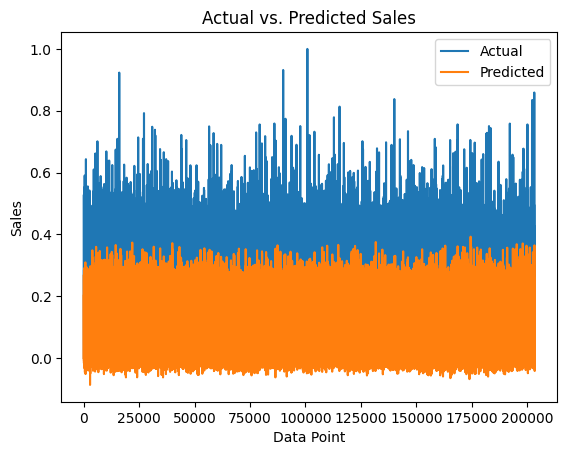

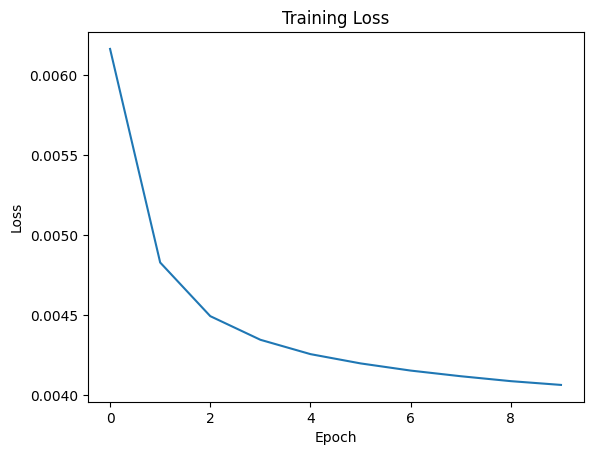

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the data
data1 = pd.read_csv("/content/train.csv")
data2 = pd.read_csv("/content/train_preprocessed.csv", compression='gzip')
data_sales = data1['Sales']

# Concatenate the data
rossman_processed_data = pd.concat([data2, data_sales], axis=1)
rossman_features = rossman_processed_data.iloc[:, :-1].values
rossman_target1 = rossman_processed_data.iloc[:, -1].values

#Normalizing the target variable
scaler=MinMaxScaler(feature_range=(0,1))
rossman_target=scaler.fit_transform(rossman_target1.reshape(-1,1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(rossman_features, rossman_target, test_size=0.2, random_state=42)

# Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Reshape the data for LSTM input [samples, time steps, features]
X_train = X_train.reshape((-1, 1, X_train.shape[1]))
X_test = X_test.reshape((-1, 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(1, X_train.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions
predictions = model.predict(X_test)

# Plot actual vs. predicted sales
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

# Plot the loss values
loss_history = history.history['loss']
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()